In [1]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Koopman linear dynamics
μ = -0.05
λ = -1
A = np.array([
    [μ,  0,   0],
    [0,  λ,  -λ],
    [0,  0, 2*μ]
])
D, T = eig(A)

# Slope of stable subspace (green)
slope_stab_man = T[2, 2] / T[1, 2]

In [3]:
# Integrate Koopman trajectories

y0A = [1.5, -1, 2.25]
y0B = [1,   -1,    1]
y0C = [2,   -1,    4]
tspan = np.arange(0, 1000, 0.01)

def koopman_derivative(y, t, A=A):
    return A @ y

yA = odeint(koopman_derivative, y0A, tspan)
yB = odeint(koopman_derivative, y0B, tspan)
yC = odeint(koopman_derivative, y0C, tspan)

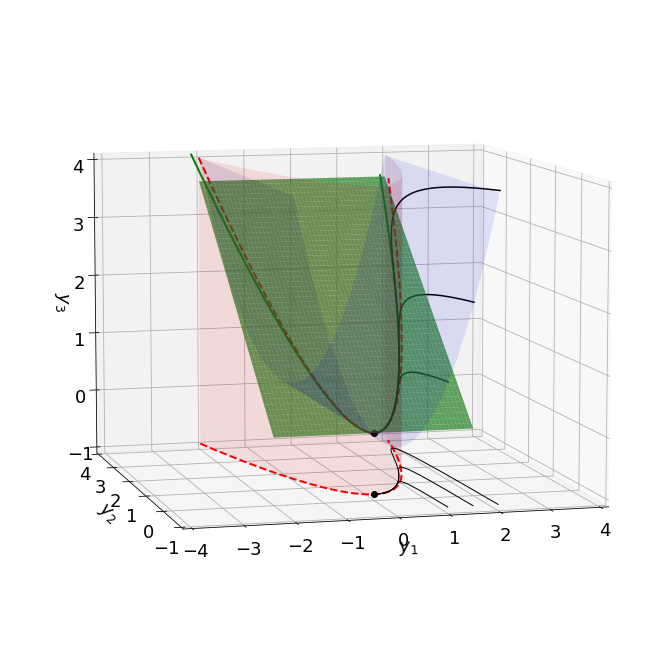

In [4]:
# Plot invariant surfaces
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(12, 12))

# Attracting manifold y_2 = y_1^2  (red manifold)
X, Z = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-1, 4, 0.01))
Y = X**2

ax.plot_surface(X, Y, Z, alpha=0.1, color='red', shade=True)

# Invariant set y_3 = y_1^2  (blue manifold)
X1, Y1 = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-1, 4, 0.01))
Z1 = X1**2

ax.plot_surface(X1, Y1, Z1, alpha=0.1, color='blue', shade=True)

# Stable invariant subspace of Koopman linear system  (green plane)
X2, Y2 = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(0, 4, 0.01))
Z2 = slope_stab_man * Y2

ax.plot_surface(X2, Y2, Z2, alpha=0.7, color='forestgreen', shade=True)

x = np.arange(-2, 2, 0.1)
# Intersection of green and blue surfaces (below)
ax.plot(x, (1/slope_stab_man) * x**2, x**2, color='green', linewidth=2)

# Intersection of red and blue surfaces (below)
ax.plot(x, x**2, x**2, '--', color='red', linewidth=2)
ax.plot(x, x**2, -1 ,'--', color='red', linewidth=2)

# Plot Koopman Trajectories
ax.plot(yA[:,0], yA[:, 1], -1, '-', color='black', linewidth=1)
ax.plot(yB[:,0], yB[:, 1], -1, '-', color='black', linewidth=1)
ax.plot(yC[:,0], yC[:, 1], -1, '-', color='black', linewidth=1)

ax.plot(yA[:, 0], yA[:, 1], yA[:, 2], '-', color='black', linewidth=1.5)
ax.plot(yB[:, 0], yB[:, 1], yB[:, 2], '-', color='black', linewidth=1.5)
ax.plot(yC[:, 0], yC[:, 1], yC[:, 2], '-', color='black', linewidth=1.5)

ax.plot([0, 0], [0, 0], [0, -1], 'o', color='black')

ax.view_init(azim=-105, elev=8)

ax.set_xlim(-4, 4)
ax.set_ylim(-1, 4)
ax.set_zlim(-1 ,4)

ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.set_zlabel('$y_3$');